In [1]:
# Load packages and check versions
import sys
import numpy as np
import pandas as pd
import matplotlib as mpl
import sklearn

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))
# The Python version is 3.8.3 (default, Jul  2 2020, 11:26:31) 
# [Clang 10.0.0 ].

# The Numpy version is 1.18.5.

# The Pandas version is 1.0.5.

# The Matplotlib version is 3.2.2.

# The Scikit-Learn version is 0.23.1.

The Python version is 3.8.3 (default, Jul  2 2020, 11:26:31) 
[Clang 10.0.0 ].

The Numpy version is 1.18.5.

The Pandas version is 1.0.5.

The Matplotlib version is 3.2.2.

The Scikit-Learn version is 0.23.1.



# Exploring the Response Variable and Concluding the Initial Exploration

Import packages

In [2]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [3]:
df = pd.read_csv('../Data/Chapter_1_cleaned_data.csv')

In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

# Introduction to Scikit-Learn

In [6]:
#Import the class
from sklearn.linear_model import LogisticRegression

In [7]:
#Create an object
my_lr = LogisticRegression()

In [8]:
#Examine it
my_lr

LogisticRegression()

In [9]:
#Instantiate while specifying keyword arguments
my_new_lr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
#5/2020: updated multi_class='warn' to multi_class='auto'

In [10]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'

In [11]:
my_new_lr

LogisticRegression(C=0.1, solver='liblinear')

In [12]:
X = df['EDUCATION'][0:10].values.reshape(-1,1)
X

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [3],
       [3]])

In [13]:
y = df['default payment next month'][0:10].values
y

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
my_new_lr.fit(X, y)

LogisticRegression(C=0.1, solver='liblinear')

In [15]:
new_X = df['EDUCATION'][10:20].values.reshape(-1,1)
new_X

array([[3],
       [1],
       [2],
       [2],
       [1],
       [3],
       [1],
       [1],
       [1],
       [3]])

In [16]:
my_new_lr.predict(new_X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [17]:
df['default payment next month'][10:20].values

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

# Generating Synthetic Data

In [18]:
from numpy.random import default_rng
rg = default_rng(12345)

In [19]:
X = rg.uniform(low=0.0, high=10.0, size=(1000,))
X[0:10]

array([2.27336022, 3.1675834 , 7.97365457, 6.76254671, 3.91109551,
       3.32813928, 5.98308754, 1.86734186, 6.72756044, 9.41802865])

In [20]:
type(X)

numpy.ndarray

# Data for a Linear Regression

In [21]:
slope = 0.25
intercept = -1.25
y = slope * X + rg.normal(loc=0.0, scale=1.0, size=(1000,)) + intercept

In [22]:
mpl.rcParams['figure.dpi'] = 400

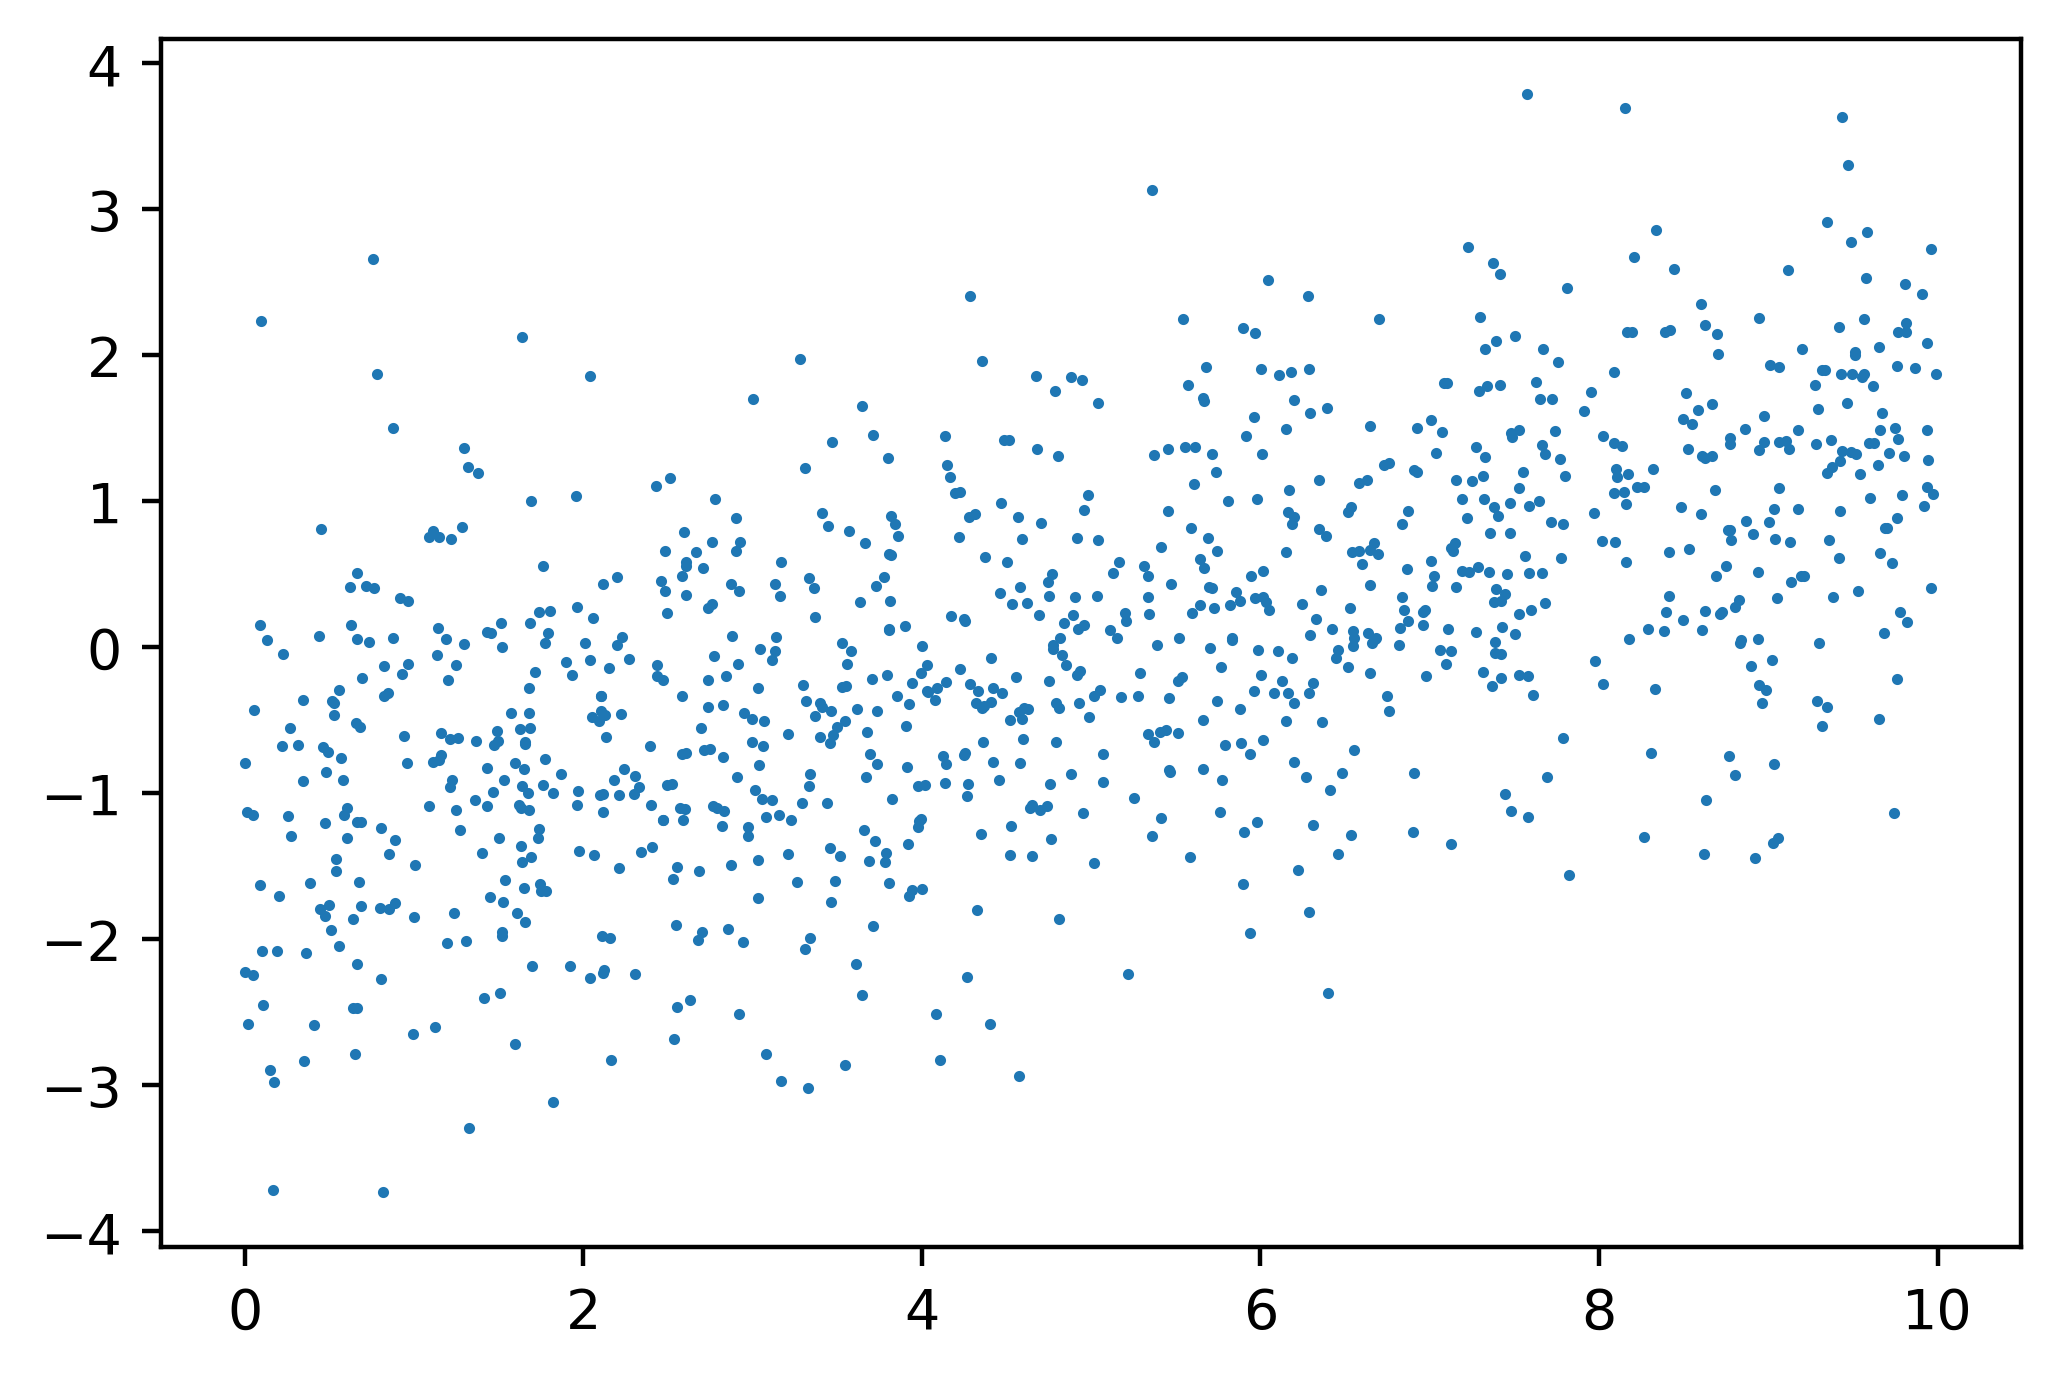

In [23]:
plt.scatter(X,y,s=1)

# Exercise 8: Linear regression in Scikit-Learn

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lin_reg = LinearRegression()

In [26]:
lin_reg

LinearRegression()

In [27]:
lin_reg.fit(X.reshape(-1,1), y)

LinearRegression()

In [28]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

-1.2522197212675905
[0.25711689]


In [29]:
y_pred = lin_reg.predict(X.reshape(-1,1))

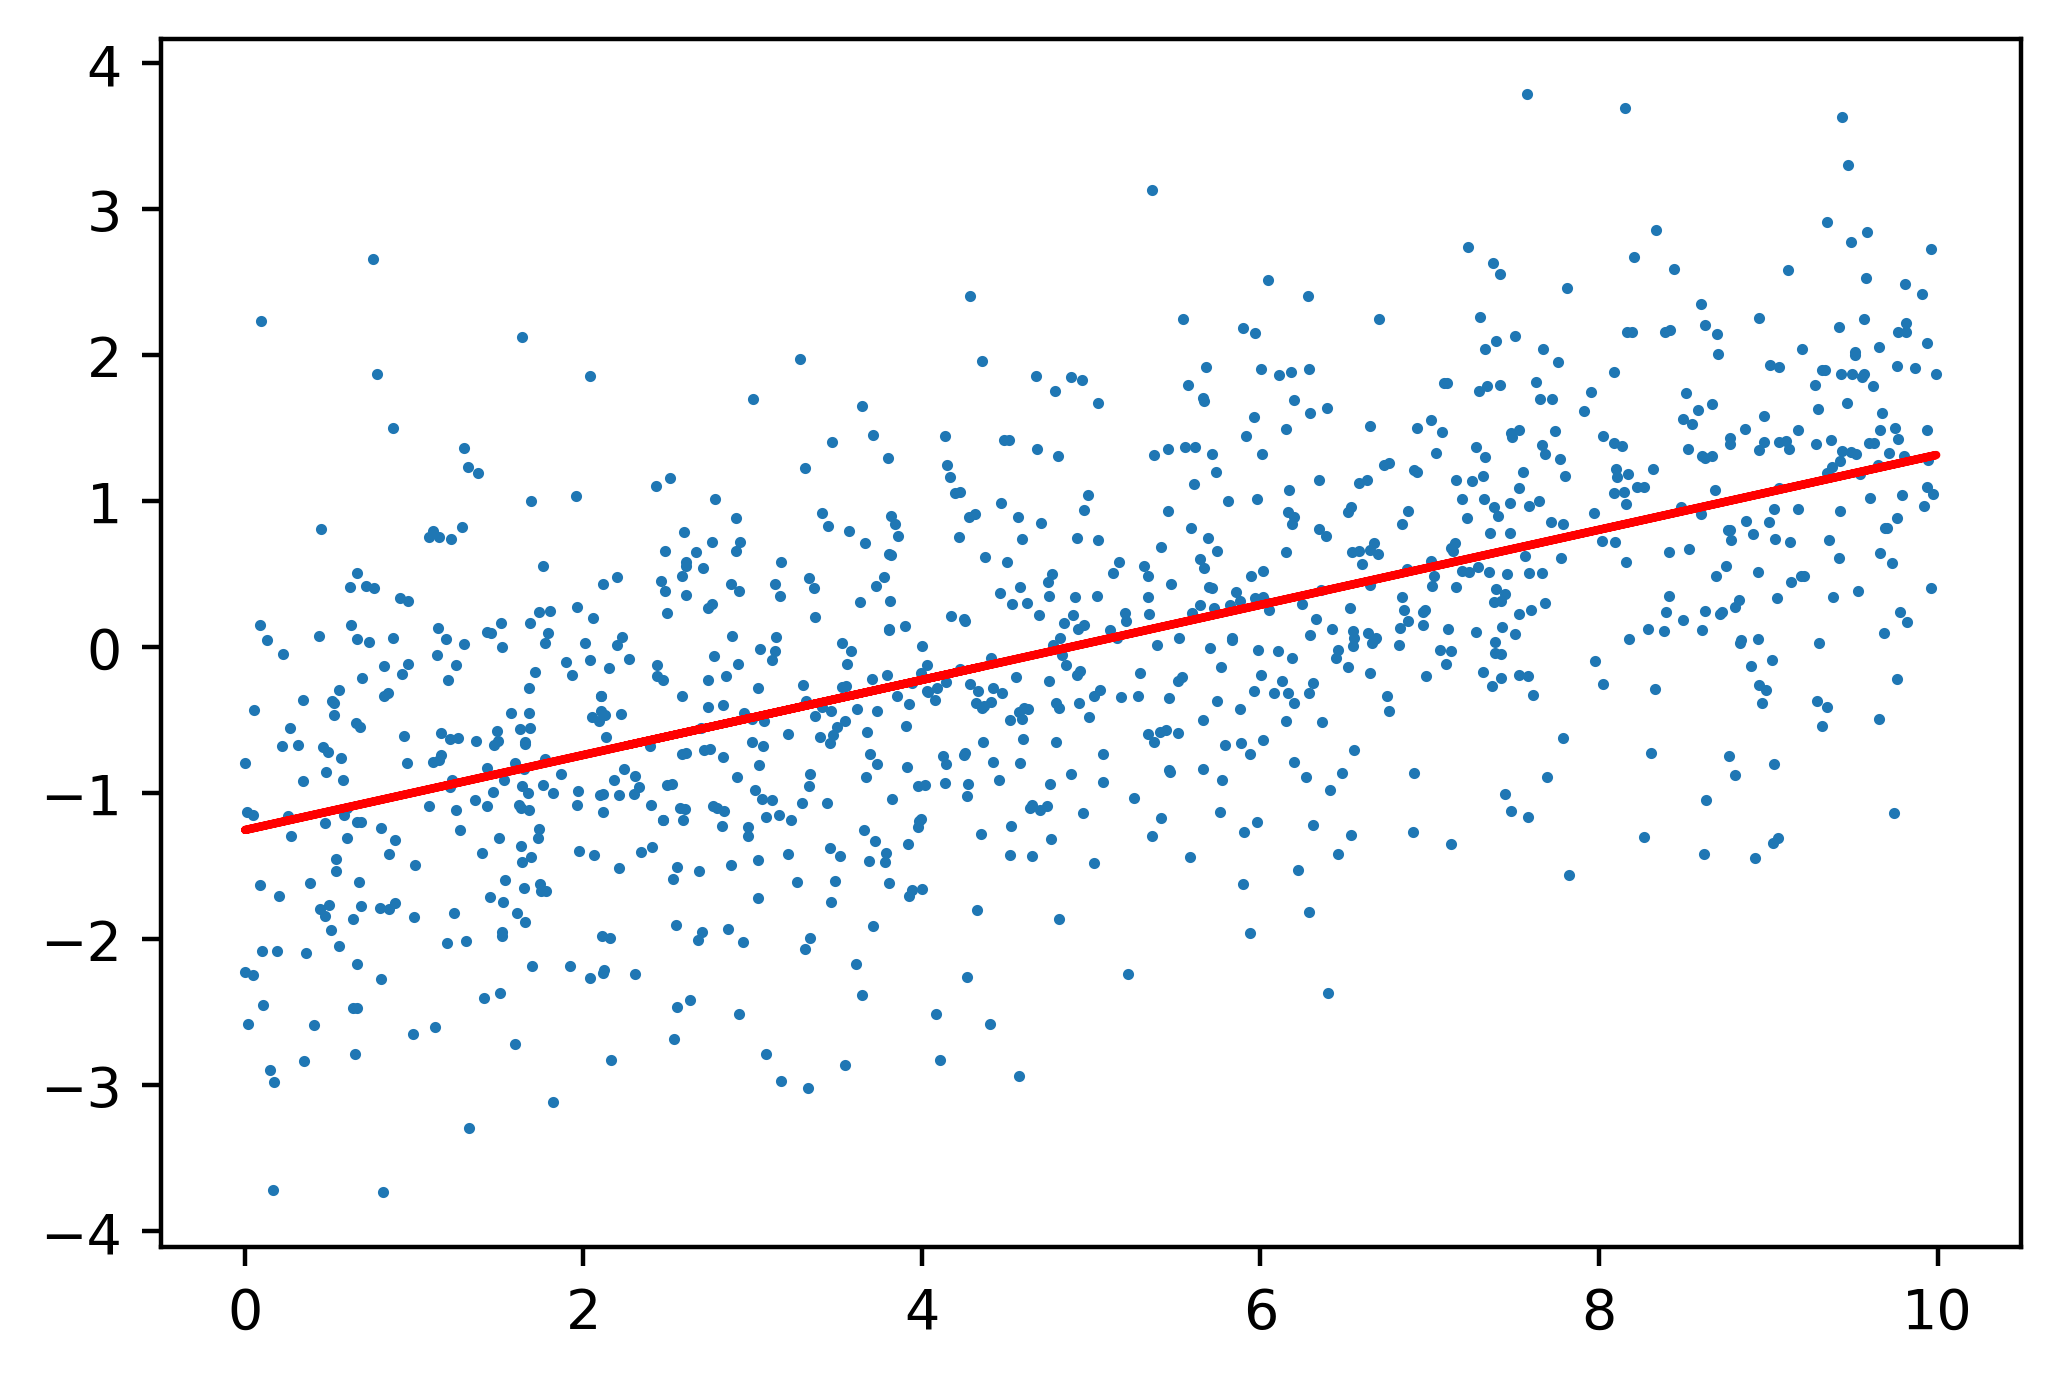

In [30]:
plt.scatter(X,y,s=1)
plt.plot(X,y_pred,'r')

# Model performance metrics for binary classification
## Splitting the data: training and testing sets

Split the data in to training (80%) and testing (20%). Introduce metrics using testing scores.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [33]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21331, 1)
(5333, 1)
(21331,)
(5333,)


In [34]:
np.mean(y_train)

0.223102526838873

In [35]:
np.mean(y_test)

0.21657603600225014

## Classification accuracy

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
example_lr = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
#5/2020: updated multi_class='warn' to multi_class='auto'

In [38]:
example_lr.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [39]:
y_pred = example_lr.predict(X_test)

Accuracy

In [40]:
is_correct = y_pred == y_test

In [41]:
np.mean(is_correct)

0.7834239639977498

In [42]:
example_lr.score(X_test, y_test)

0.7834239639977498

In [43]:
from sklearn import metrics

In [44]:
metrics.accuracy_score(y_test, y_pred)

0.7834239639977498

# Exercise 9: Calculating the True and False Positive and Negative Rates and Confusion Matrix in Python

In [45]:
P = sum(y_test)
P

1155

In [46]:
TP = sum( (y_test==1) & (y_pred==1) )
TP

0

In [47]:
TPR = TP/P
TPR

0.0

In [48]:
FN = sum( (y_test==1) & (y_pred==0) )
FN

1155

In [49]:
FNR = FN/P
FNR

1.0

In [50]:
N = sum(y_test==0)
N

4178

In [51]:
TN = sum( (y_test==0) & (y_pred==0))
TN

4178

In [52]:
FP = sum( (y_test==0) & (y_pred==1))
FP

0

In [53]:
TNR = TN/N
FPR = FP/N
print('The true negative rate is {} and the false positive rate is {}'.format(TNR, FPR))

The true negative rate is 1.0 and the false positive rate is 0.0


In [54]:
metrics.confusion_matrix(y_test, y_pred)

array([[4178,    0],
       [1155,    0]])

# Exercise 10: Obtaining Predicted Probabilities from a Trained Logistic Regression Model

In [55]:
y_pred_proba = example_lr.predict_proba(X_test)
y_pred_proba

array([[0.77423402, 0.22576598],
       [0.77423402, 0.22576598],
       [0.78792915, 0.21207085],
       ...,
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085],
       [0.78792915, 0.21207085]])

In [56]:
prob_sum = np.sum(y_pred_proba,1)
prob_sum

array([1., 1., 1., ..., 1., 1., 1.])

In [57]:
prob_sum.shape

(5333,)

In [58]:
np.unique(prob_sum)

array([1.])

In [59]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.22576598, 0.22576598, 0.21207085, ..., 0.21207085, 0.21207085,
       0.21207085])

(array([1883.,    0.,    0., 2519.,    0.,    0.,  849.,    0.,    0.,
          82.]),
 array([0.21207085, 0.21636321, 0.22065556, 0.22494792, 0.22924027,
        0.23353263, 0.23782498, 0.24211734, 0.24640969, 0.25070205,
        0.2549944 ]),
 <a list of 10 Patch objects>)

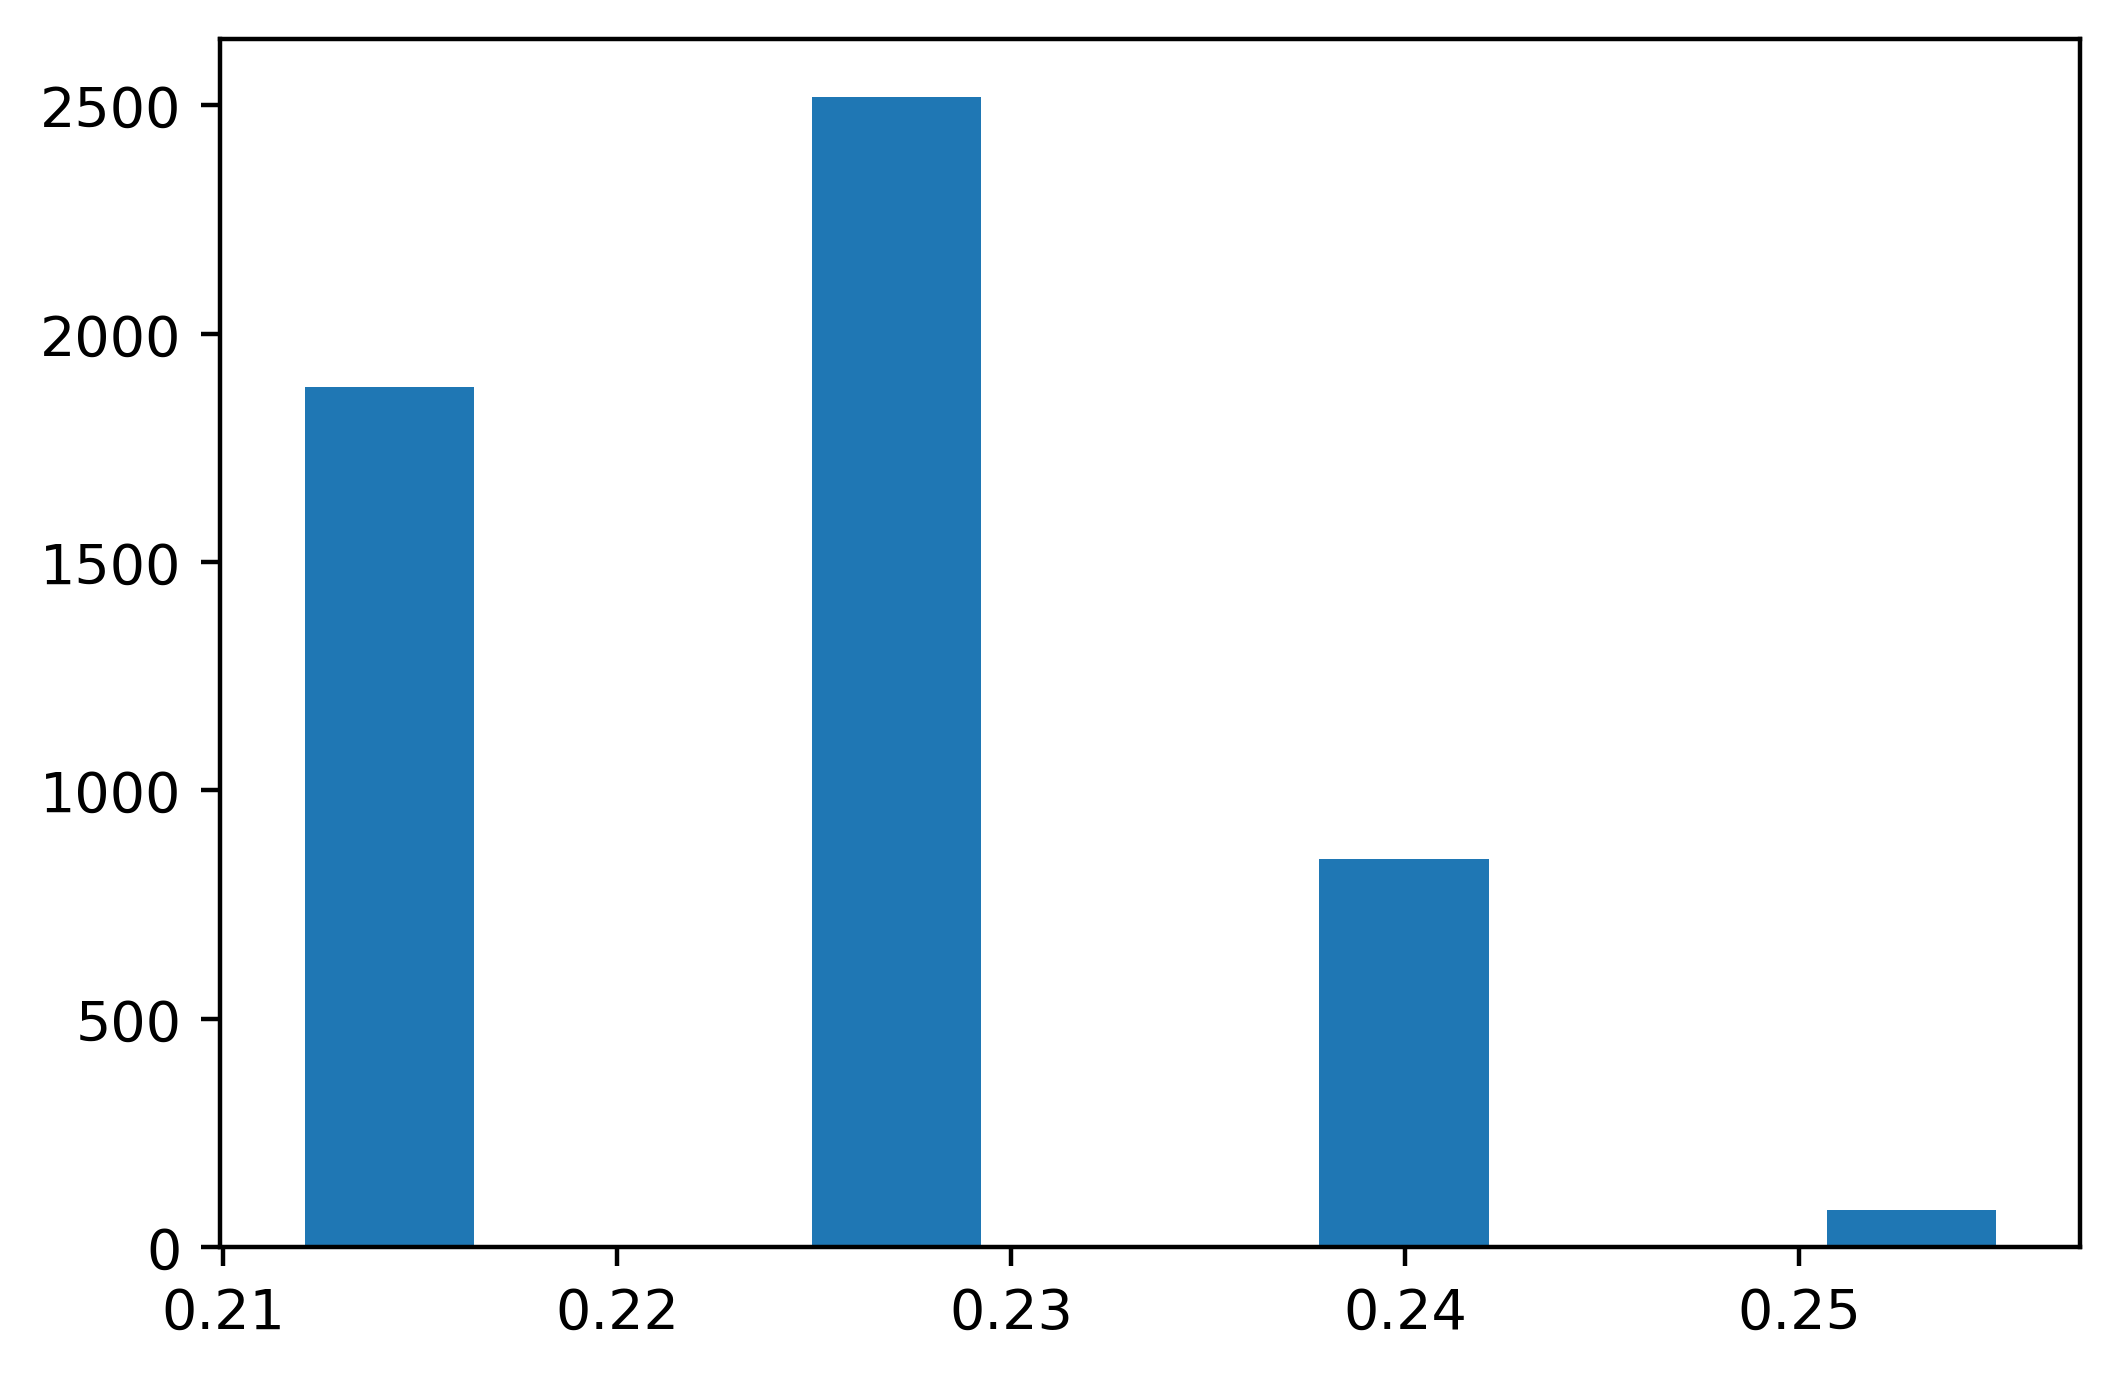

In [60]:
plt.hist(pos_proba)

Text(0, 0.5, 'Number of samples')

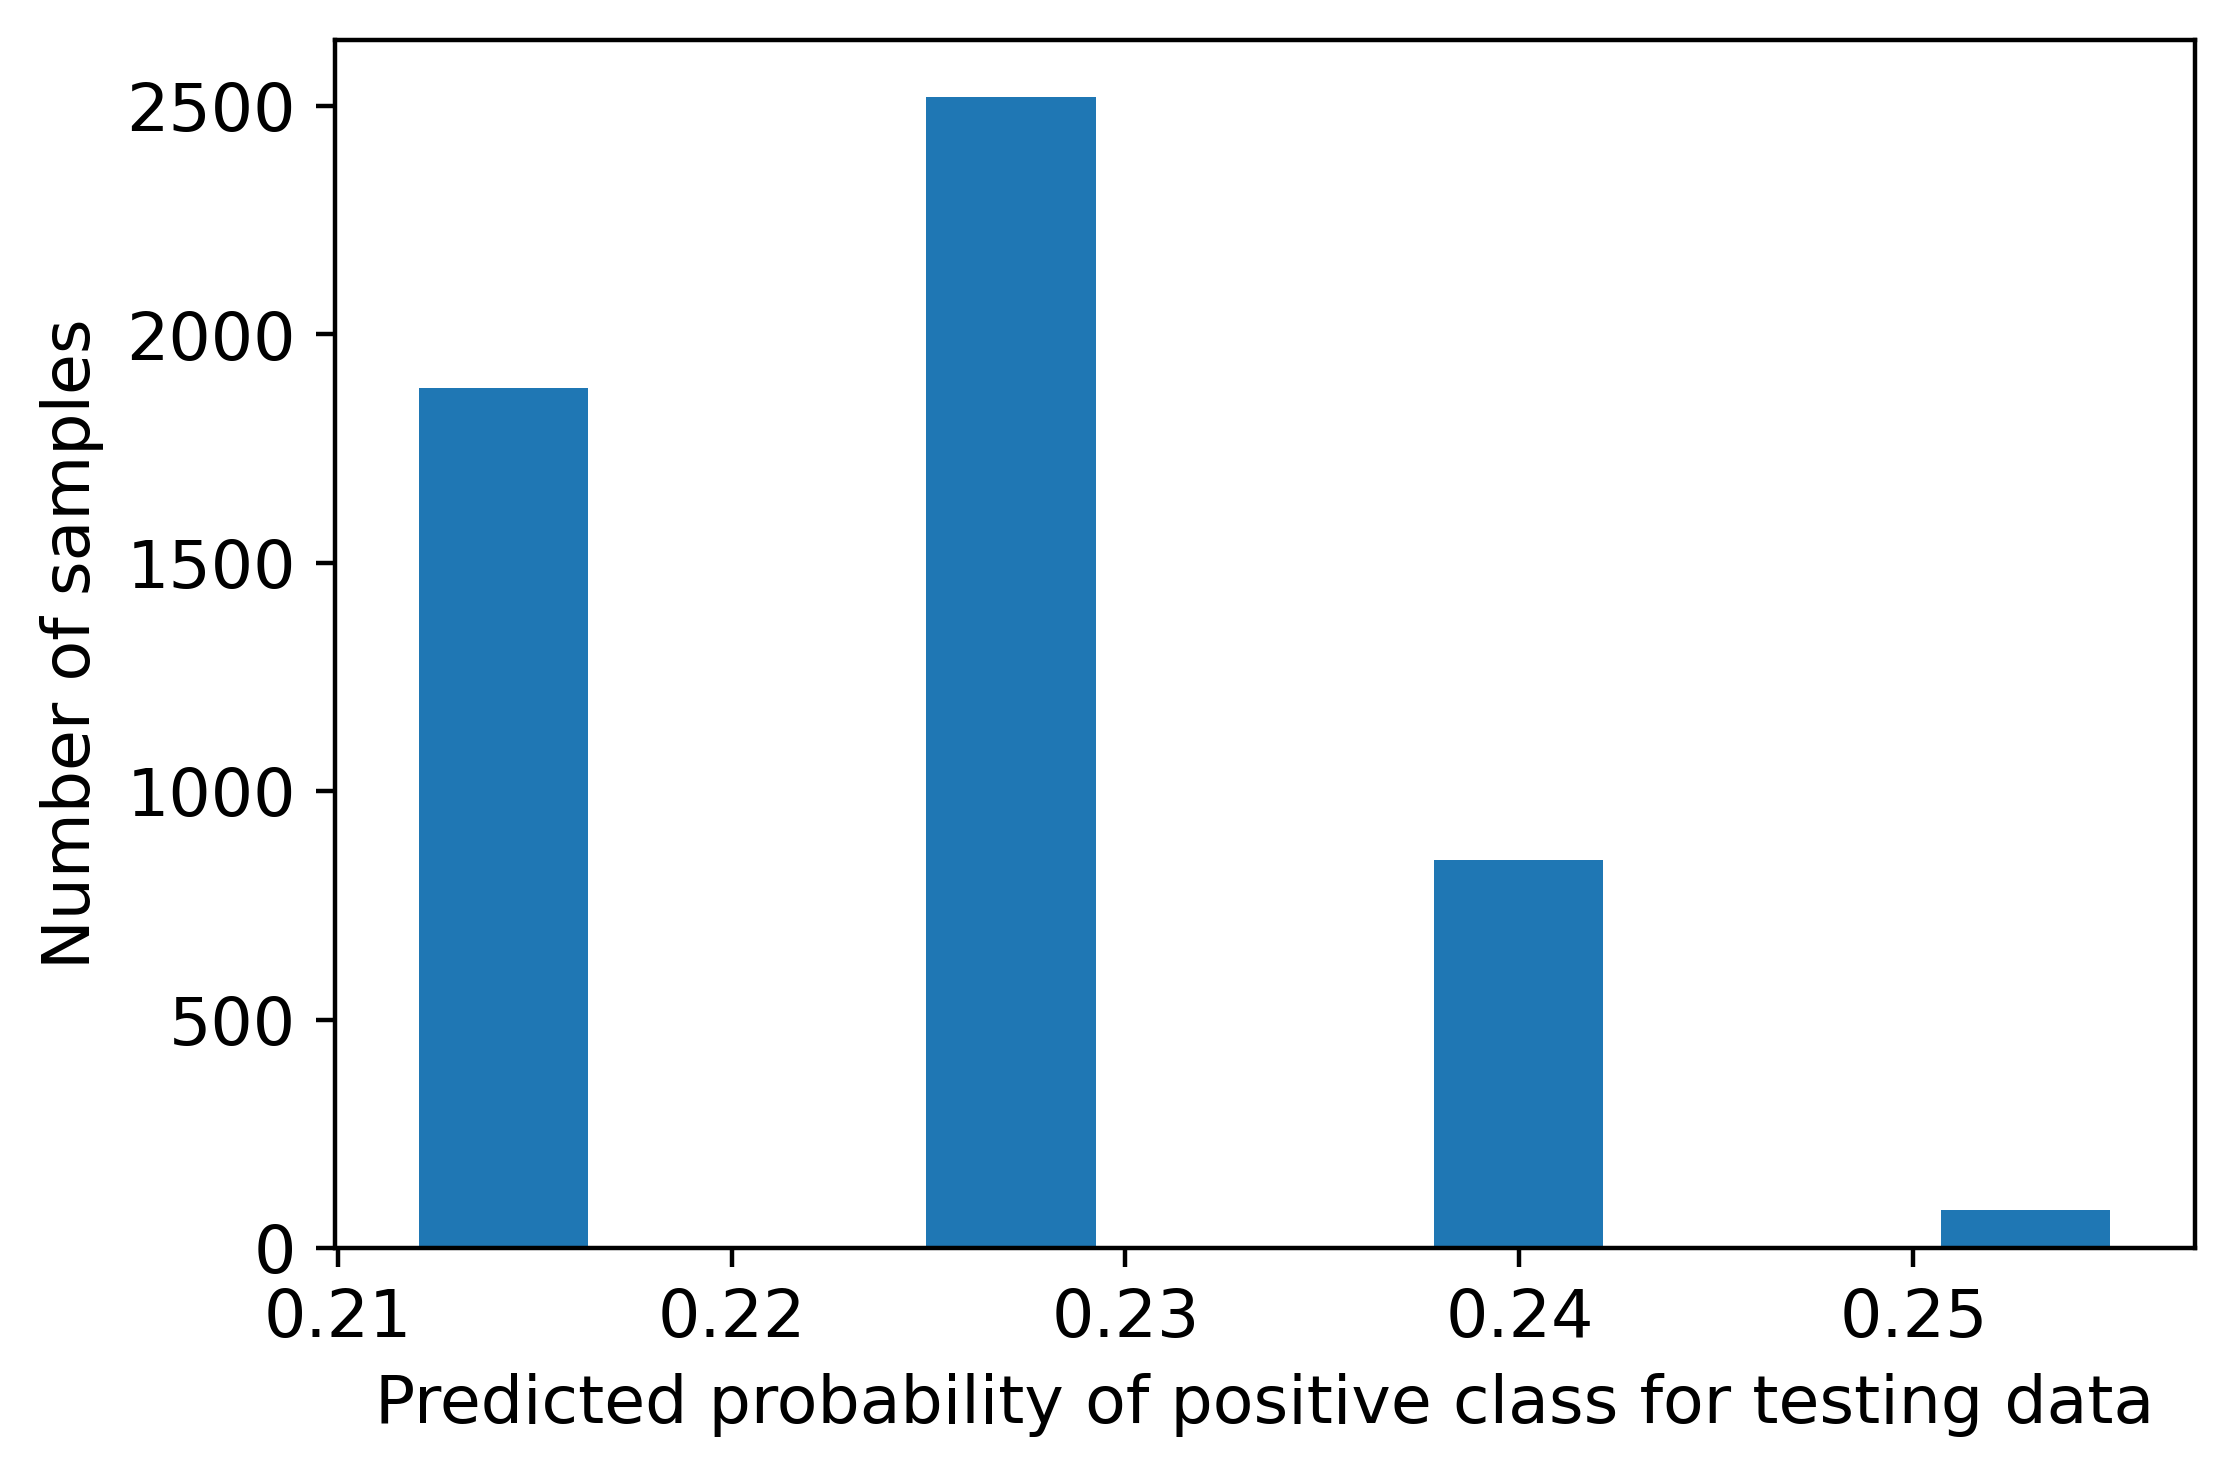

In [61]:
mpl.rcParams['font.size'] = 12
plt.hist(pos_proba)
plt.xlabel('Predicted probability of positive class for testing data')
plt.ylabel('Number of samples')

In [62]:
pos_sample_pos_proba = pos_proba[y_test==1]
neg_sample_pos_proba = pos_proba[y_test==0]

Text(0, 0.5, 'Number of samples')

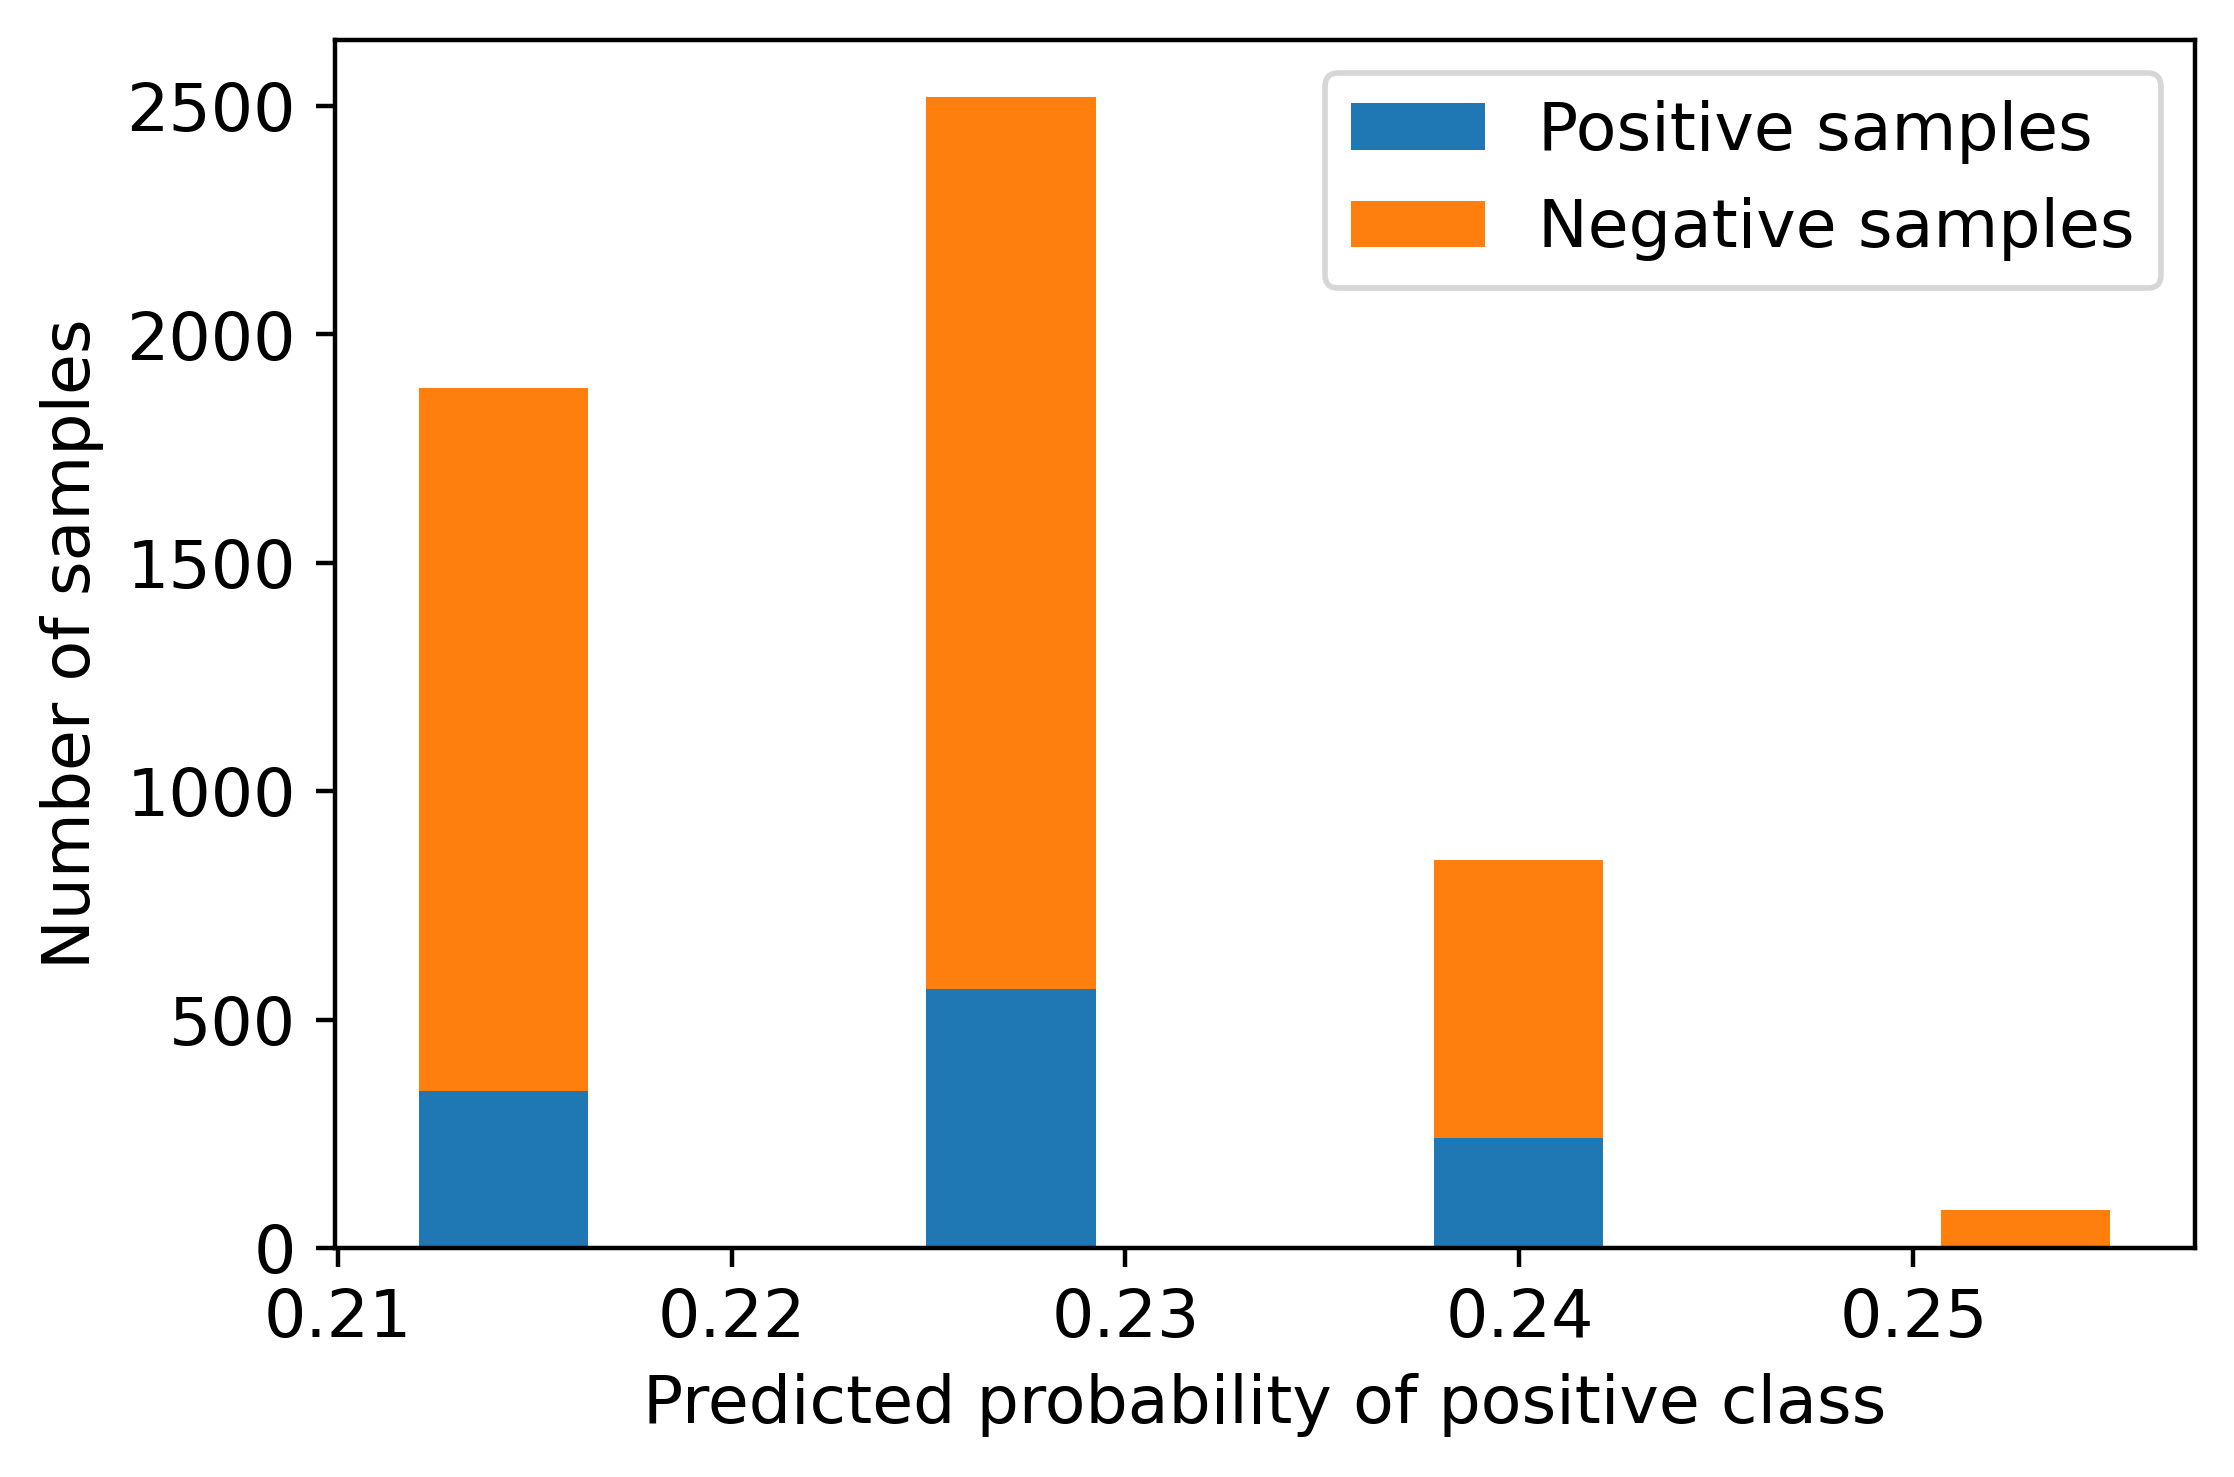

In [63]:
plt.hist([pos_sample_pos_proba, neg_sample_pos_proba], histtype='barstacked')
plt.legend(['Positive samples', 'Negative samples'])
plt.xlabel('Predicted probability of positive class')
plt.ylabel('Number of samples')

# The Receiver Operating Characteristic (ROC) curve

In [64]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pos_proba)

Text(0.5, 1.0, 'ROC curve')

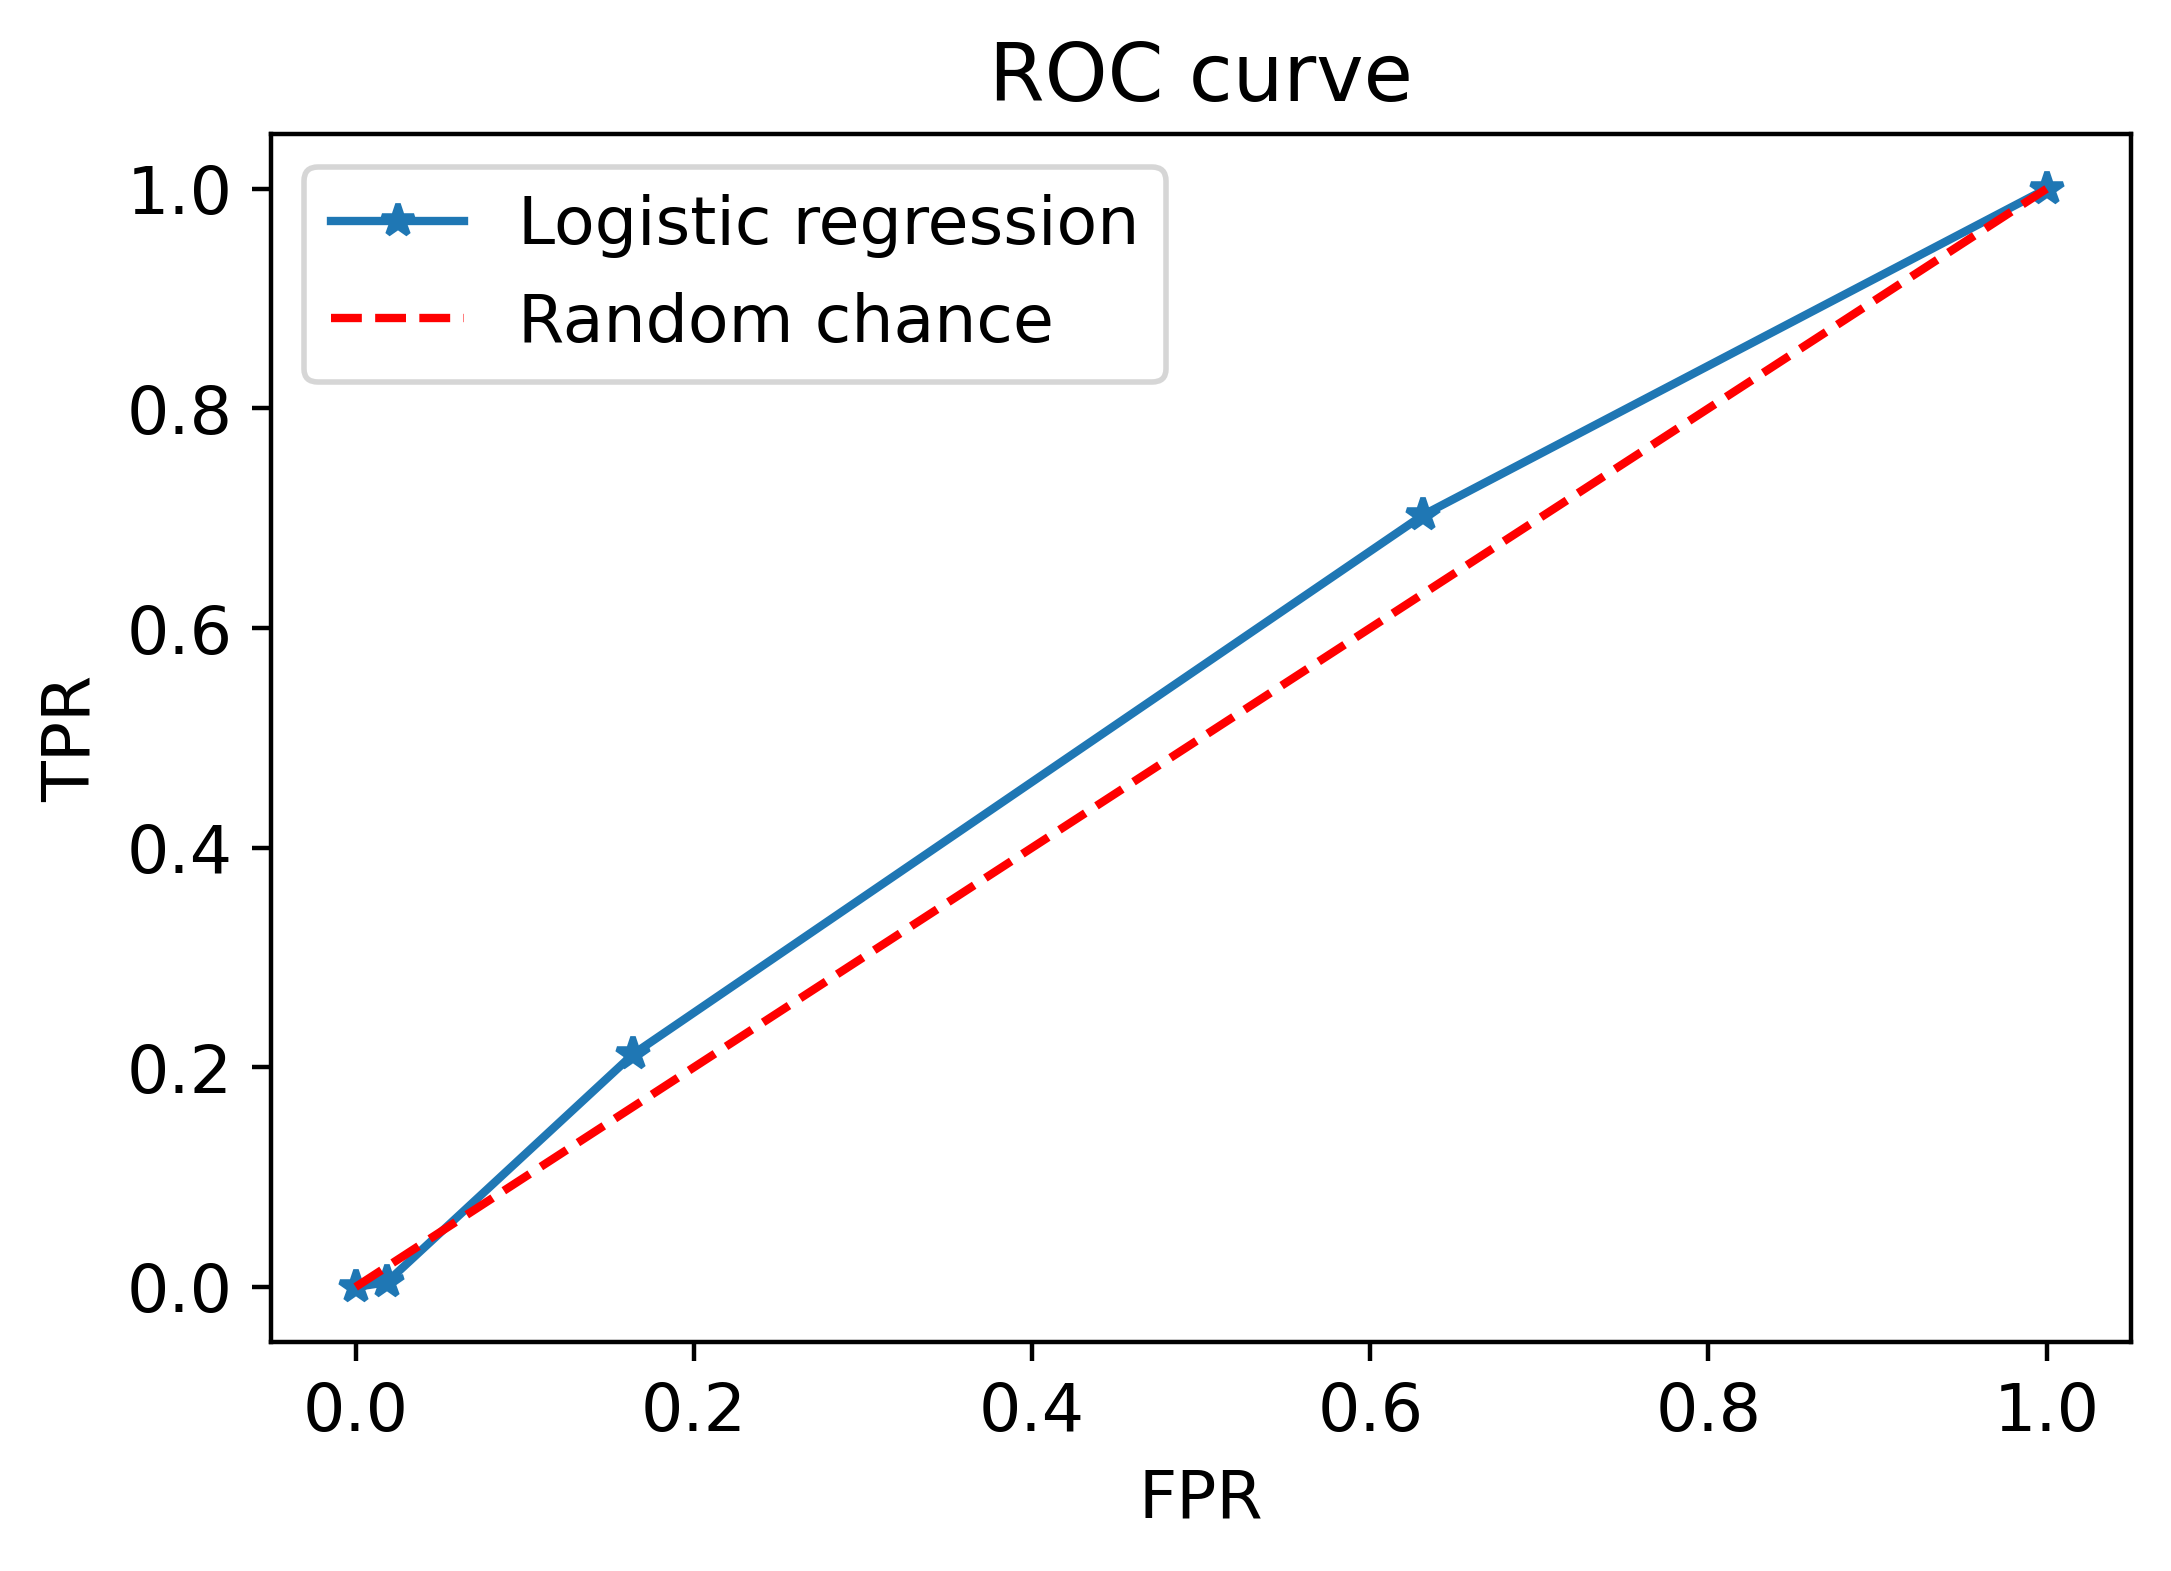

In [65]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [66]:
thresholds

array([1.2549944 , 0.2549944 , 0.24007604, 0.22576598, 0.21207085])

In [67]:
metrics.roc_auc_score(y_test, pos_proba)

0.5434650477972642

# Activity 2: Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve

In [68]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
df['LIMIT_BAL'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.2, random_state=24)

In [69]:
example_lr.fit(X_train_2, y_train_2)

LogisticRegression(C=0.1, solver='liblinear')

In [70]:
y_test_2_pred_proba = example_lr.predict_proba(X_test_2)

In [71]:
metrics.roc_auc_score(y_test_2, y_test_2_pred_proba[:,1])

0.6201990844642832

In [72]:
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test_2, y_test_2_pred_proba[:,1])

Text(0.5, 1.0, 'ROC curve for logistic regression with LIMIT_BAL feature')

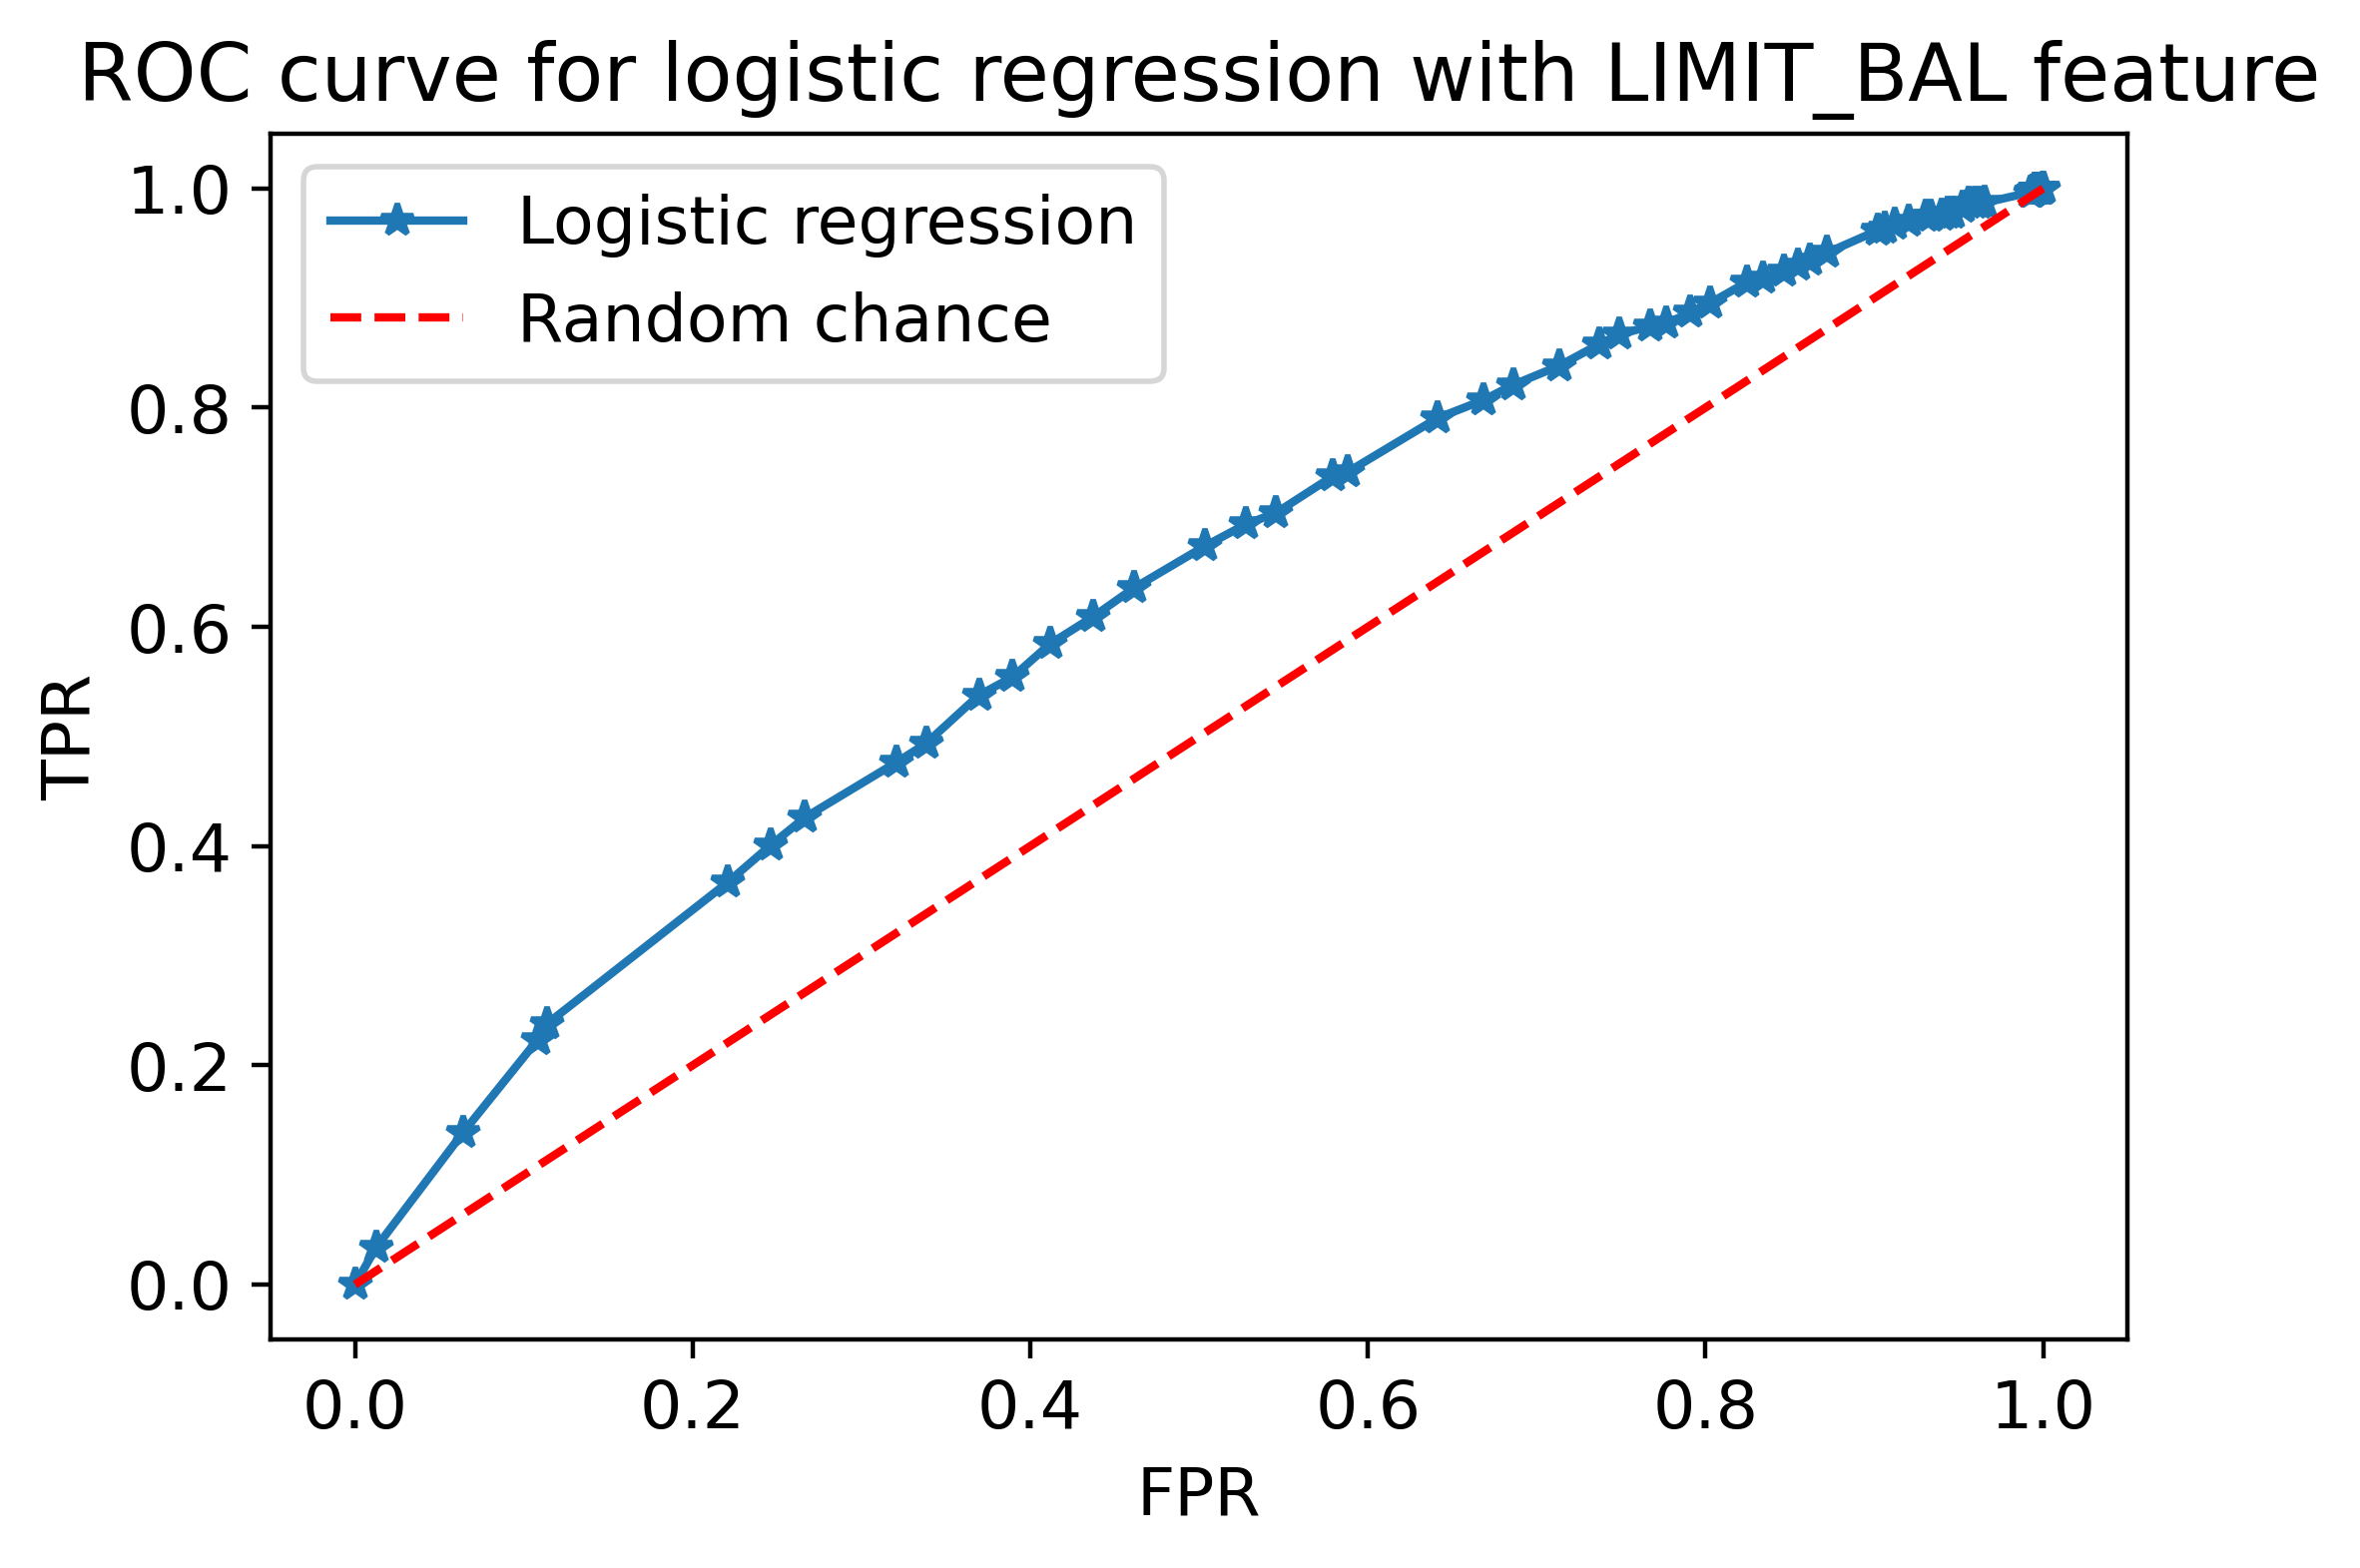

In [73]:
plt.plot(fpr_2, tpr_2, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for logistic regression with LIMIT_BAL feature')

In [74]:
precision, recall, thresh_3 = \
metrics.precision_recall_curve(y_test_2, y_test_2_pred_proba[:,1])

(0.0, 1.0)

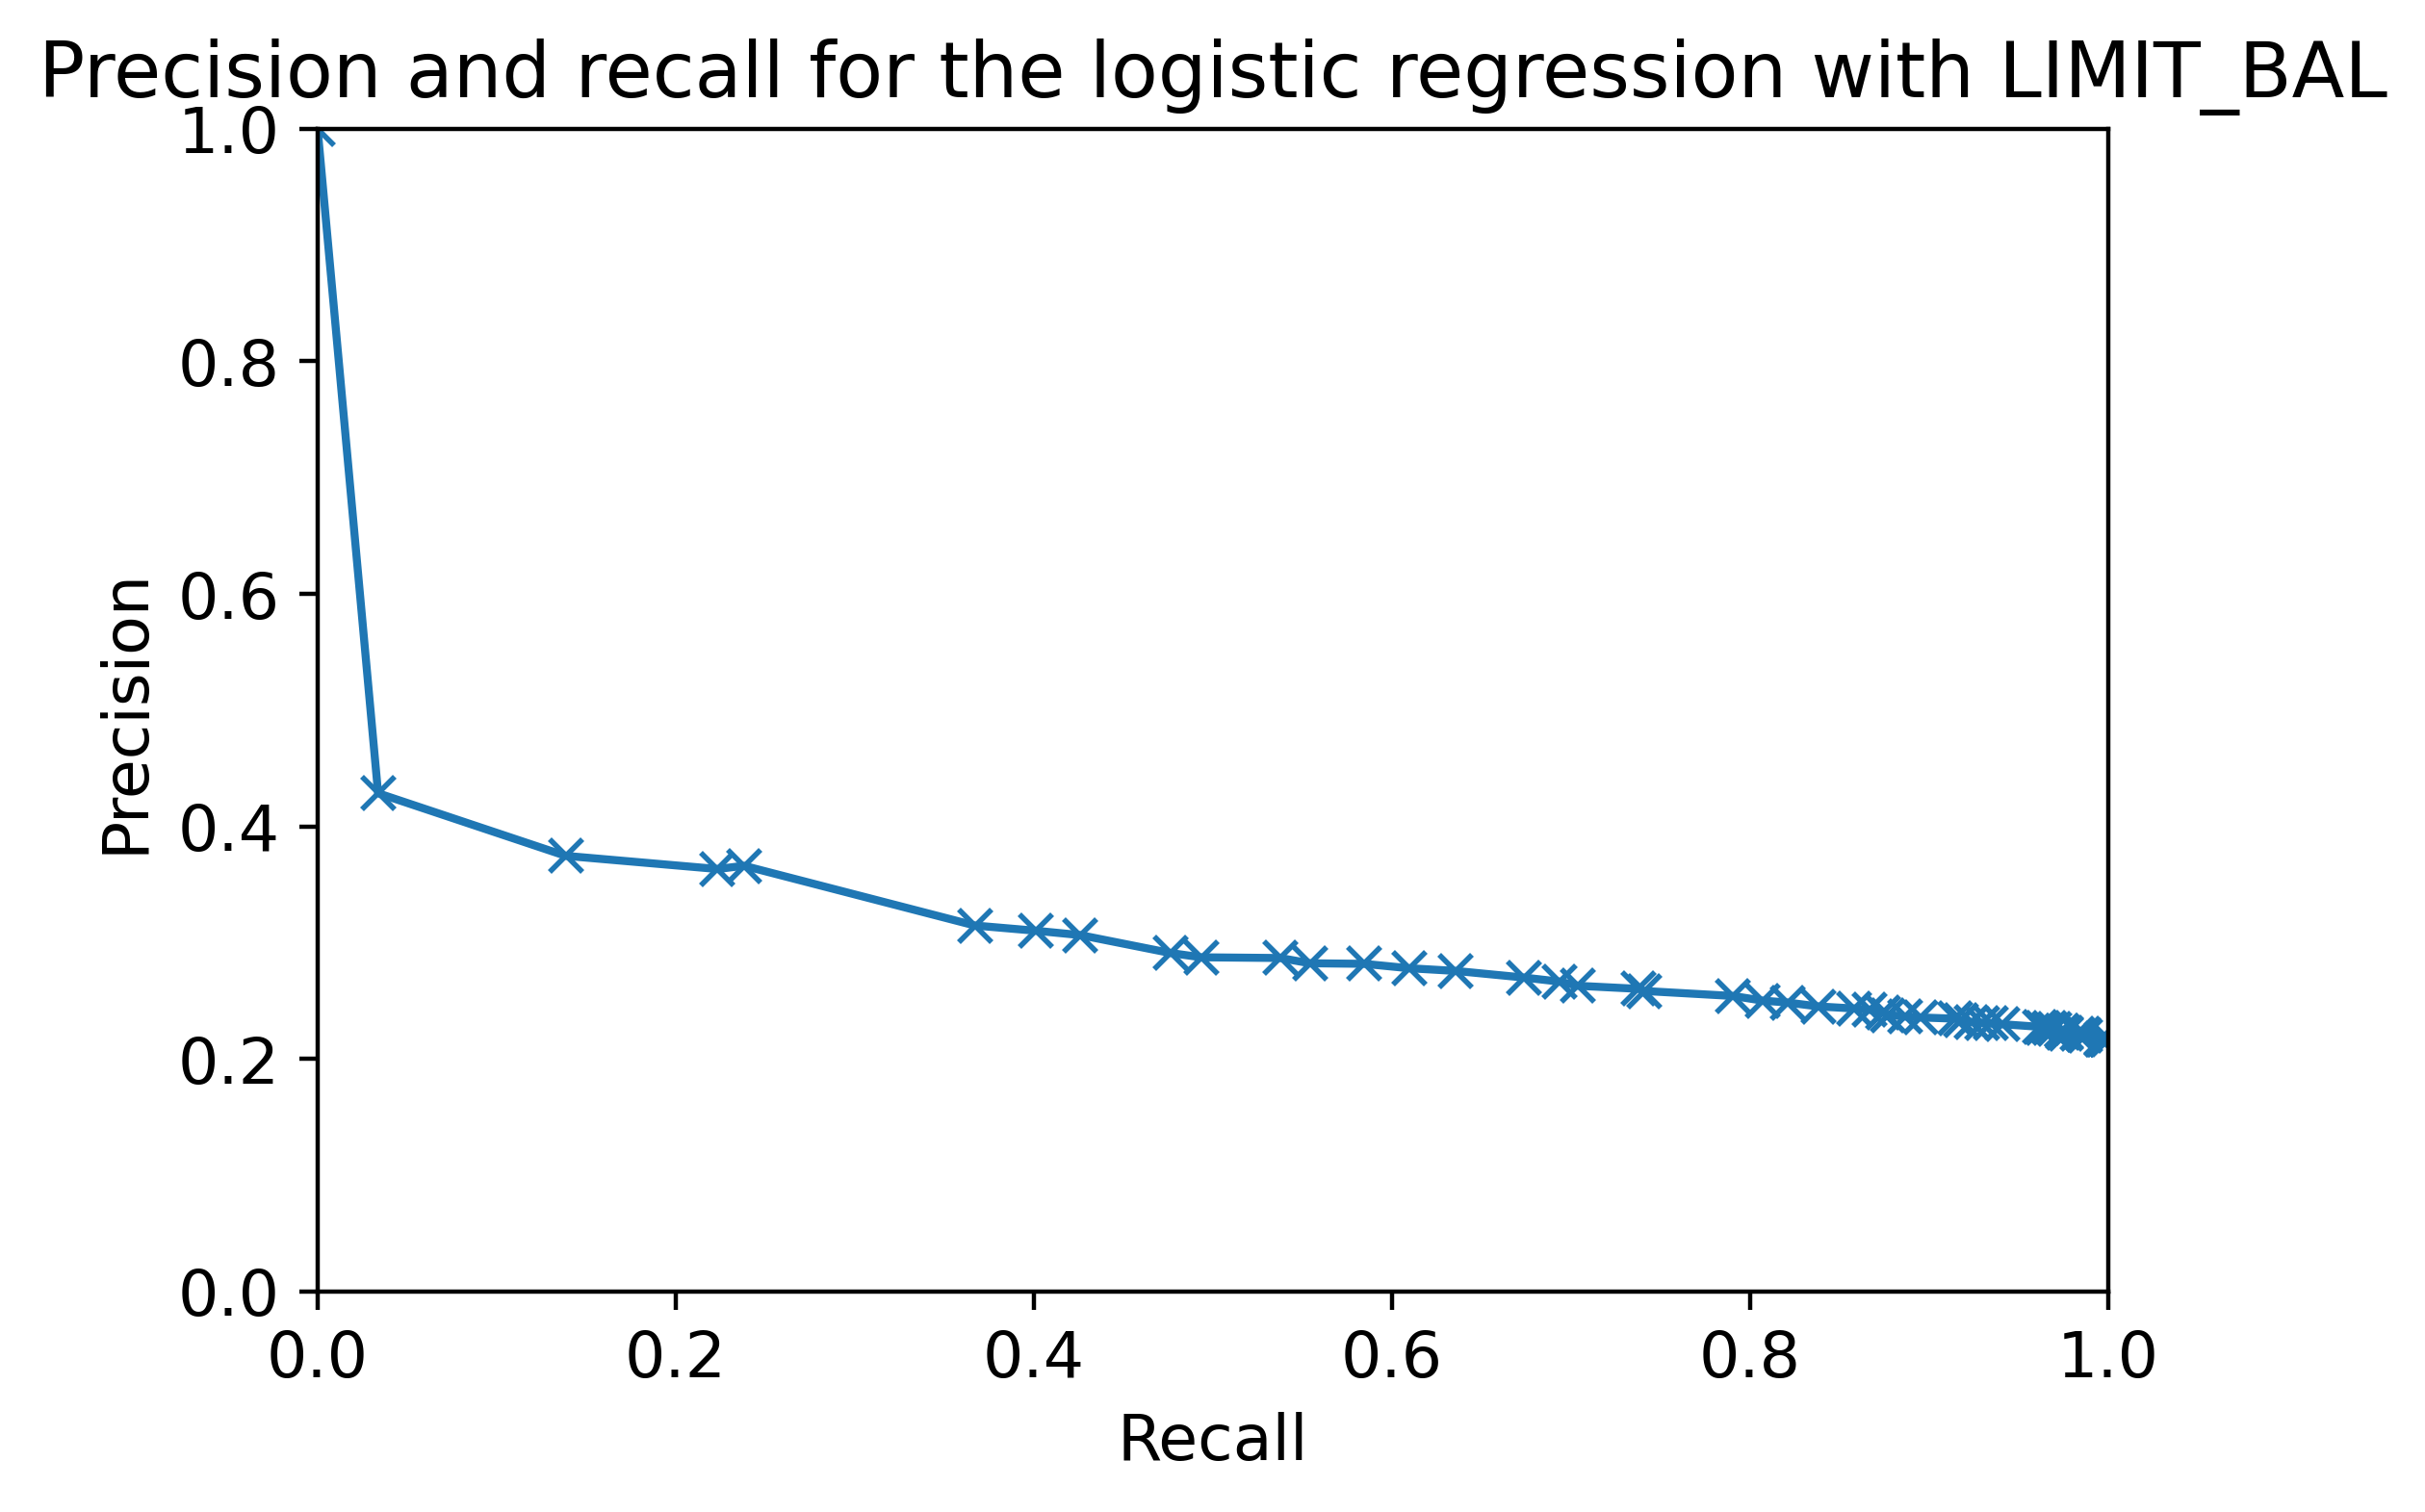

In [75]:
plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision and recall for the logistic regression with LIMIT_BAL')
plt.xlim([0, 1])
plt.ylim([0, 1])

In [76]:
metrics.auc(recall, precision)

0.31566964427378624

In [77]:
y_train_2_pred_proba = example_lr.predict_proba(X_train_2)

In [78]:
metrics.roc_auc_score(y_train_2, y_train_2_pred_proba[:,1])

0.6182918113358344